In [ ]:
# !pip uninstall shapely
# !pip install shapely --no-binary shapely

# !pip install cartopy

# Tutorial: https://github.com/groundhogday321/python-cartopy/blob/master/Python%20Cartopy.ipynb

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
import numpy as np
import pandas as pd
from vega_datasets import data as vds

In [ ]:
airports = vds.airports()
airports = airports.iloc[:10]
airports.head()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')
folder_path = "/content/drive/My Drive/Data Visualisation/"

earthquakes_data = pd.read_csv(folder_path + "eartquakes_Romania.csv")
earthquakes_data.head()

minValuesObj = earthquakes_data.min(skipna=False)
print('minimum value in each column including NaN: ')
print(minValuesObj)

minValuesObj = earthquakes_data.max(skipna=False)
print('maximum value in each column including NaN: ')
print(minValuesObj)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
minimum value in each column including NaN: 
time                 1990-01-13T06:55:07.280Z
latitude                              43.8088
longitude                              20.966
depth                                       0
mag                                       2.5
magType                                     m
nst                                       NaN
gap                                       NaN
dmin                                      NaN
rms                                       NaN
net                                        us
id                                 us10001msg
updated              2013-10-12T21:32:35.000Z
place              0km SSW of Nereju, Romania
type                               earthquake
horizontalError                           NaN
depthError                                NaN
magError                                  Na

In [ ]:
Great	8 or more
Major	7 - 7.9
Strong	6 - 6.9
Moderate	5 - 5.9
Light	4 - 4.9
Minor	3 -3.9

In [42]:
def get_depth_color(depth):
  if depth < 50:
    return '#78d9ff'
  if depth < 100:
    return '#00cc99'
  if depth < 150:
    return '#ffff33'
  if depth < 200:
    return '#ff9966'
  else:
    return '#cc0000'

In [47]:
def get_magnitude_color(magnitude):
  if magnitude < 4:
    return '#78d9ff'
  if magnitude >= 4 and magnitude < 5:
    return '#00cc99'
  if magnitude >= 5 and magnitude < 6:
    return '#ffff33'
  if magnitude >= 6 and magnitude < 7:
    return '#ff9966'
  if magnitude >= 7 and magnitude < 8:
    return '#ff3300'
  if magnitude >= 8:
    return '#cc0000' # red
  else:
    return 'gray'

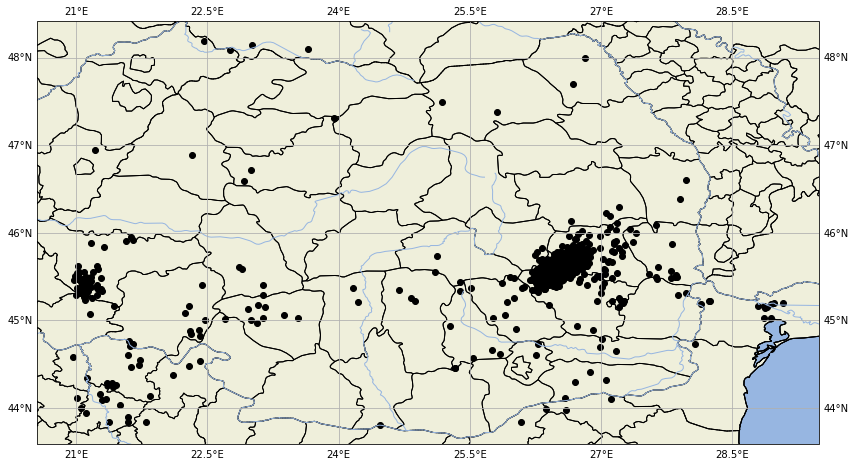

In [46]:
fig = plt.figure(figsize=(14, 14))
m6 = plt.axes(projection=ccrs.PlateCarree())    
m6.add_feature(cfeature.STATES)
m6.add_feature(cfeature.LAND)
m6.add_feature(cfeature.OCEAN)
m6.add_feature(cfeature.COASTLINE)
m6.add_feature(cfeature.BORDERS, linestyle=':')
m6.add_feature(cfeature.LAKES, alpha=0.5)
m6.add_feature(cfeature.RIVERS)
grid_lines = m6.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
m6.coastlines()
for i in earthquakes_data.itertuples():
    m6.scatter(i.longitude, i.latitude, color="black", transform=ccrs.PlateCarree())
    plt.text(i.longitude, i.latitude, "")

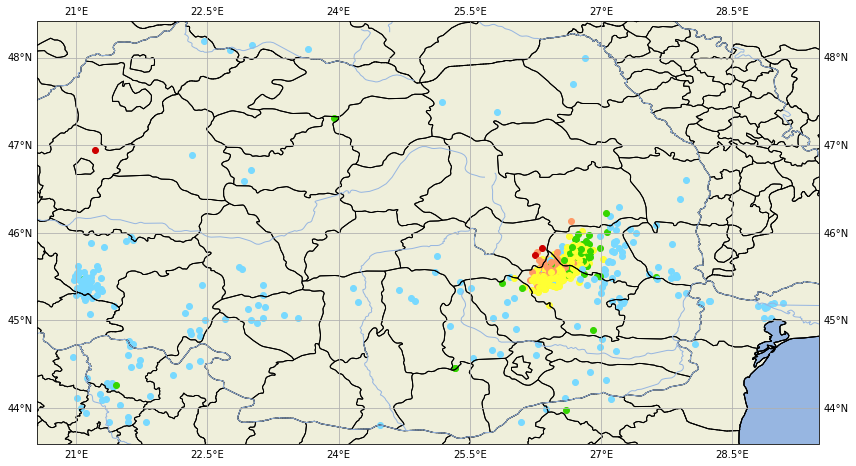

In [64]:
fig = plt.figure(figsize=(14, 14))
m6 = plt.axes(projection=ccrs.PlateCarree())    
m6.add_feature(cfeature.STATES)
m6.add_feature(cfeature.LAND)
m6.add_feature(cfeature.OCEAN)
m6.add_feature(cfeature.COASTLINE)
m6.add_feature(cfeature.BORDERS, linestyle=':')
m6.add_feature(cfeature.LAKES, alpha=0.5)
m6.add_feature(cfeature.RIVERS)
grid_lines = m6.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
m6.coastlines()
for i in earthquakes_data.itertuples():
    m6.scatter(i.longitude, i.latitude, color=get_depth_color(i.depth), transform=ccrs.PlateCarree())
    plt.text(i.longitude, i.latitude, "")

No handles with labels found to put in legend.


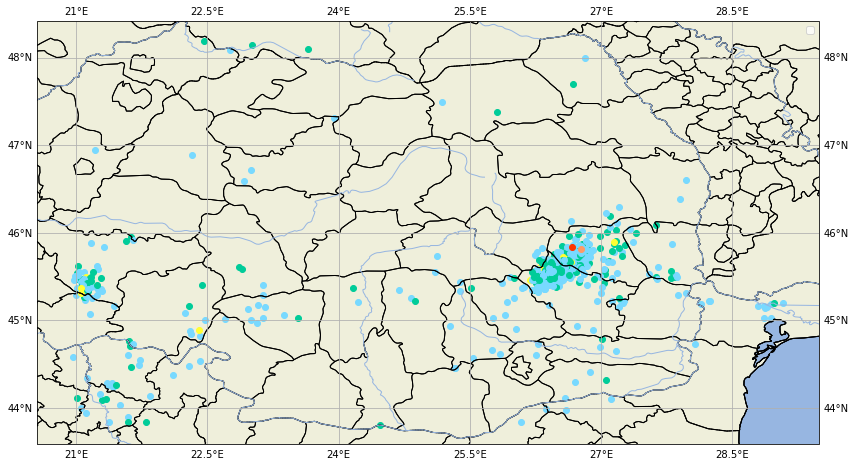

In [52]:
fig = plt.figure(figsize=(14, 14))
m6 = plt.axes(projection=ccrs.PlateCarree())    
m6.add_feature(cfeature.STATES)
m6.add_feature(cfeature.LAND)
m6.add_feature(cfeature.OCEAN)
m6.add_feature(cfeature.COASTLINE)
m6.add_feature(cfeature.BORDERS, linestyle=':')
m6.add_feature(cfeature.LAKES, alpha=0.5)
m6.add_feature(cfeature.RIVERS)
grid_lines = m6.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
m6.coastlines()
for i in earthquakes_data.itertuples():
    m6.scatter(i.longitude, i.latitude, color=get_magnitude_color(i.mag), transform=ccrs.PlateCarree())
    plt.text(i.longitude, i.latitude, "")
plt.legend()

In [63]:
# # matplotlib

# # data
# x = [1,2,3,4,5,6,7,8,9,10]
# y = [2,2,1,4,5,1,4,2,3,5]
# labels = list('abcdefghij')
# print(labels)

# # plot
# scatter = plt.scatter(x, y, s=800, c=range(len(labels)), cmap='coolwarm')
# plt.title('Plot with Marker Labels')

# # legend
# handles, _ = scatter.legend_elements(prop='colors')
# print(handles)
# plt.legend(handles, labels, loc=(1.05,0), title='Labels');

# # label each point
# for i, label in enumerate(labels):
#     plt.text(x=x[i], y=y[i], s=label)